# Zestaw zadań: Analiza błędow
## Zadanie 2
### Autor: Artur Gęsiarz

In [25]:
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt

### Implementacja pomocniczych funkcji
#### - Pojedyncza, podwójna prezycja oraz wykorzystanie fractions

In [26]:
def generate_sequence_single(n = 225):
    x = np.zeros(n, dtype=np.float32)
    x[0] = 1/3
    x[1] = 1/12
    for k in range(2, n):
        x[k] = 2.25 * x[k-1] - 0.5 * x[k-2]
    return x

def generate_sequence_double(n = 60):
    x = np.zeros(n, dtype=np.float64)
    x[0] = 1/3
    x[1] = 1/12
    for k in range(2, n):
        x[k] = 2.25 * x[k-1] - 0.5 * x[k-2]
    return x

def generate_sequence_fraction(n = 225):
    x = np.zeros(n, dtype=object)
    x[0] = Fraction(1,3)
    x[1] = Fraction(1,12)
    for k in range(2, n):
        x[k] = Fraction(9,4) * x[k-1] - Fraction(1,2) * x[k-2]
    return x

### Implementacja funkcji repzentujacej faktyczna wartosc tego ciagu

In [27]:
def exact_solution(k):
    return 4 ** (-k) / 3

### Rysownie wykresu pierwszego
##### - porównujacego działanie trzech funkcji obliczajacych ciag z funkcja dającą prawidłowe wyniki

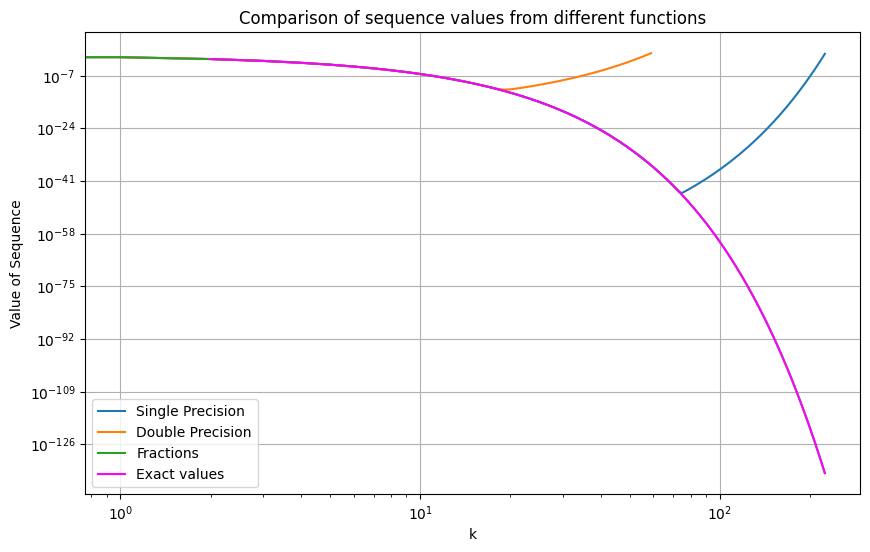

In [28]:
sequence_single = generate_sequence_single()
sequence_double = generate_sequence_double()
sequence_fraction = generate_sequence_fraction()
exact_values = [exact_solution(k) for k in range(2,225)]

plt.figure(figsize=(10, 6))
plt.loglog(range(225), sequence_single, label='Single Precision')
plt.loglog(range(60), sequence_double, label='Double Precision')
plt.loglog(range(225), sequence_fraction, label='Fractions')
plt.loglog(range(2,225), exact_values, label='Exact values', color="fuchsia")
plt.xlabel('k')
plt.ylabel('Value of Sequence')
plt.title('Comparison of sequence values from different functions')
plt.legend()
plt.grid(True)
plt.show()

### Implemetnacja funkcji liczączej błąd

In [29]:
def absolute_relative_error(k, generate_function):
    return np.abs(exact_solution(k) - generate_function(k)[k - 1])

### Rysownie wykresu drugiego - porównującego błędy bezwzglednie otrzymane z trzech funkcji

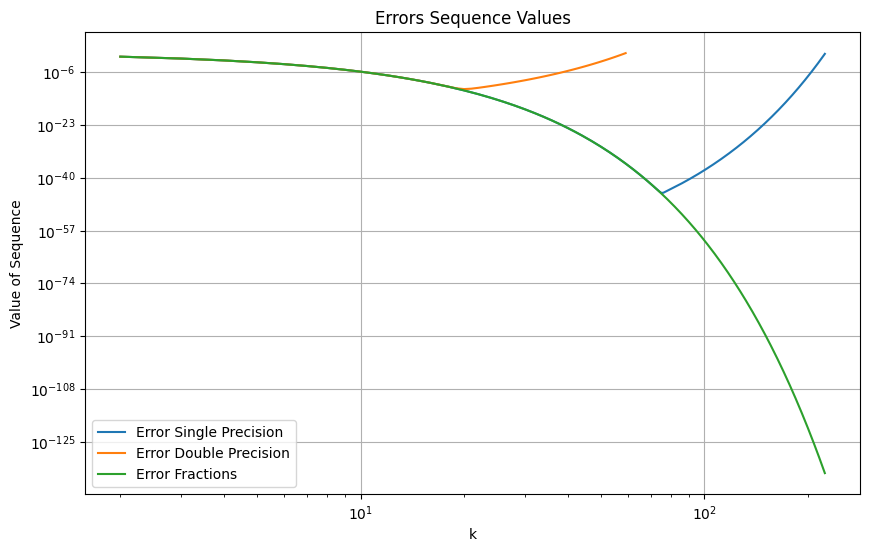

In [30]:
error_single = [absolute_relative_error(k, generate_sequence_single) for k in range(2,225)]
error_double = [absolute_relative_error(k, generate_sequence_double) for k in range(2,60)]
error_fraction = [absolute_relative_error(k, generate_sequence_fraction) for k in range(2,225)]

plt.figure(figsize=(10, 6))
plt.loglog(range(2,225), error_single, label='Error Single Precision')
plt.loglog(range(2,60), error_double, label='Error Double Precision')
plt.loglog(range(2,225), error_fraction, label='Error Fractions')
plt.xlabel('k')
plt.ylabel('Value of Sequence')
plt.title('Errors Sequence Values')
plt.legend()
plt.grid(True)
plt.show()

# Podsumowanie
###     Porównując trzy funkcje obliczające wartości tego ciagu ale z inna precyzja mozna łatwo dojść do wniosku ze najlepiej robi to funkcja wykorzystuajac klase Fraciton.
### Wyniki błędów tych funkcji są dobrze widoczne na wykesie i zdecydowanie funkcja wykorzystajca klase Fraction ma najmniejszy błąd, ale zaraz po niej jest
### fuckcja wykorzystujaca prezycje float64.
###     Jak widac także na pierwszym wykresie funkcja wykorzstujaca prezycje Fraction ma w dominującej wiekszosci pokrywajce sie wyniki z prawdziwa funkcja obliczajaca wartosc tego ciagu
### Dzieje sie tak ponieważ klasa Fraction przechowuje liczby w postaci ułamków, co eliminuje błędy związane z reprezentacją liczb w formacie zmiennoprzecinkowym.
### Ponieważ liczby zmiennoprzecinkowe mają skończoną precyzję, niektóre operacje arytmetyczne mogą prowadzić do błędów zaokrąglenia, które się akumulują i prowadzą do niedokładnych wyników.
###     Z kolei funkcja wykorzystująca precyzję float64 również daje dobre wyniki, ponieważ float64 to podwójna precyzja zmiennoprzecinkowa,
### co oznacza, że liczby są przechowywane z większą dokładnością niż w pojedynczej precyzji. Jednak nadal występują błędy związane z zaokrągleniami.
###     Natomiast funkcja używająca pojedynczej precyzji float32 ma największy błąd, ponieważ pojedyncza precyzja ma mniejszą dokładność niż podwójna precyzja, co prowadzi do większych błędów zaokrąglenia.

### Funkcja wykorzystująca klasę Fraction daje wyniki najbardziej zbliżone do prawdziwej wartości ciągu, ponieważ ułamki pozwalają na zachowanie pełnej precyzji podczas obliczeń,
### bez ryzyka utraty cyfr znaczących. W przeciwieństwie do liczb zmiennoprzecinkowych, które muszą zaokrąglić wyniki do określonej liczby bitów,
### ułamki pozostają dokładne. Dlatego wyniki funkcji z użyciem Fraction są bardziej zgodne z oczekiwanymi wartościami.